# Logistic Regression exercise

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

In [2]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]

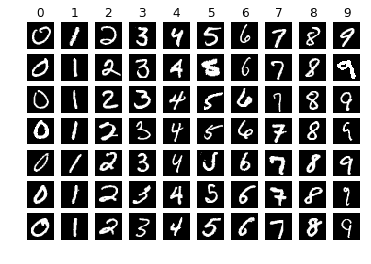

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(10)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Binary classification
We use the Logistic Regression to classification handwritten digits wheather it's zero or not. If the handwritten digits is '0' , then the label is 0, otherwise, the label is 1.

In [4]:
# transform the labels to binary
for i in xrange(len(labels)):
    if labels[i] != 0:
        labels[i] = 1
        
# 2/3 training set
# 1/3 test set
split_index = len(labels) * 2 / 3
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])  
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print X_train.shape
print X_test.shape

(28000L, 785L)
(14000L, 785L)


In [5]:
# X_train_feats = min_max(X_train) # choose and extract features
# X_test_feats = min_max(X_test)  
X_train_feats = X_train # choose and extract features
X_test_feats = X_test

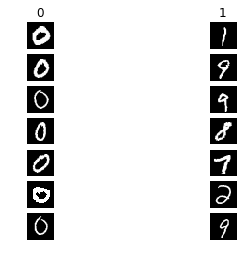

In [6]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(2)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [11]:
from DSVC.classifiers import LogisticRegression

# Start training. 
# You should open DSVC/classifiers/logistic_regression.py and implement the function.
# Then run this cell.

classifier = LogisticRegression()
loss_history = classifier.train(
    X_train_feats, 
    y_train,
    learning_rate = 1e-5,
    num_iters = 8000,
    batch_size = 64,
)

iteration 0 / 8000: loss 179.793923
iteration 1000 / 8000: loss 0.282560
iteration 2000 / 8000: loss 0.931884
iteration 3000 / 8000: loss 1.251359
iteration 4000 / 8000: loss 2.962572
iteration 5000 / 8000: loss 1.976465
iteration 6000 / 8000: loss 1.761829
iteration 7000 / 8000: loss 2.073939
iteration 7999 / 8000: loss 0.257277


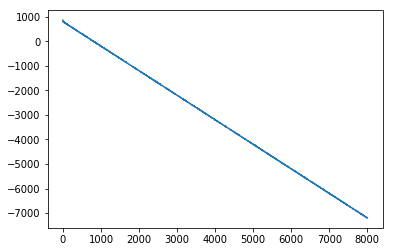

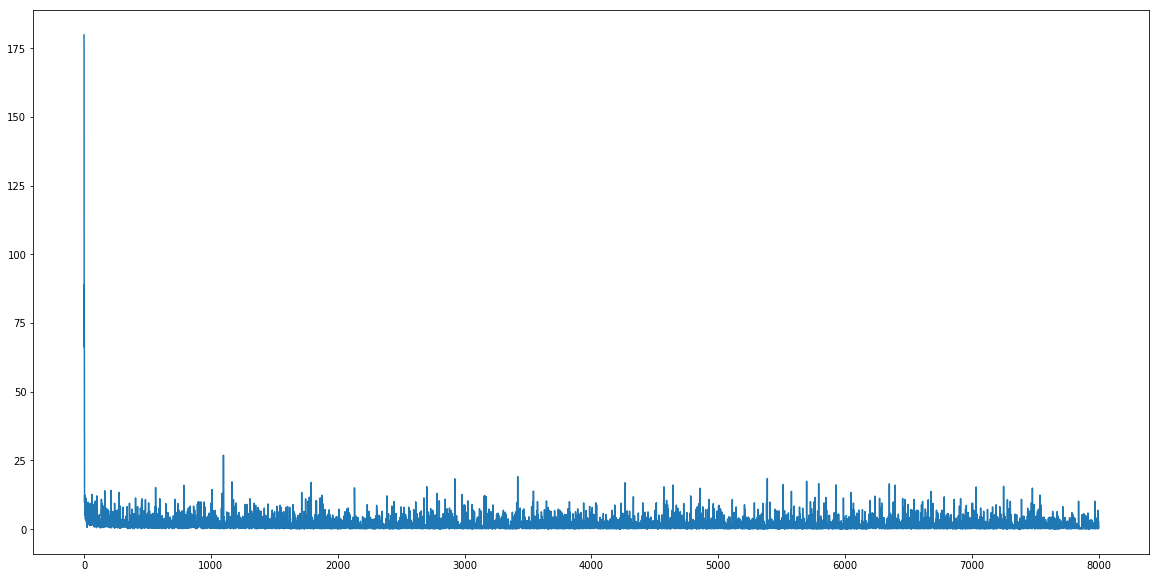

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(loss_history)

slicer :0.990000 , The max accuracy socre is 50.214286
阈值与准确率的曲线


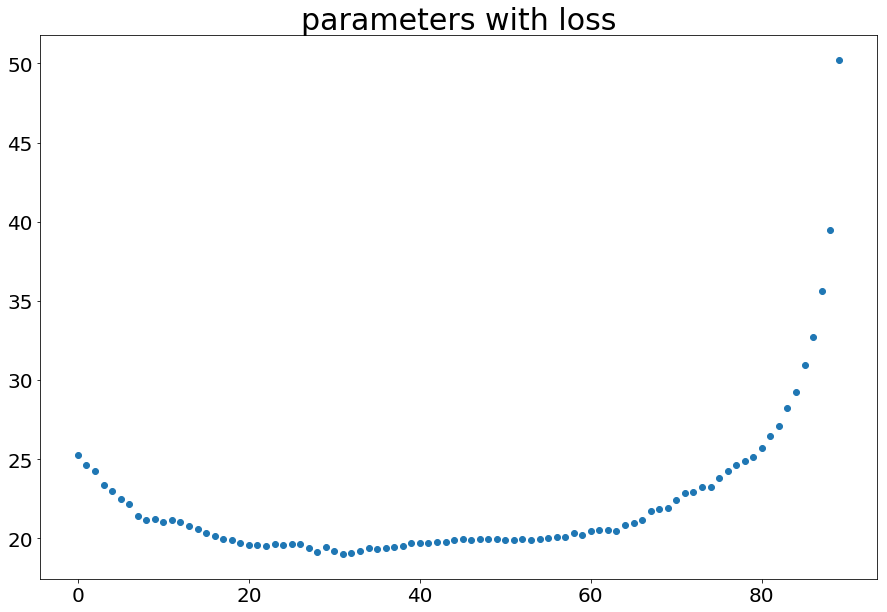

In [20]:
# you may change your code in function `predict`
slicers = []
accuracys = []
for i in range(10,100):
    slicer = i / 100.0 
    slicers.append(slicer)
    y_test_pred = classifier.predict(X_test_feats,slicer=slicer,one_vs_all=False)
    accuracy = np.mean(y_test == y_test_pred)
    temp = (1.0-(accuracy)+0.01)*1000
    accuracys.append(temp)
max_index = np.argmax(accuracys)
print "slicer :%f , The max accuracy socre is %f" % (slicers[max_index],accuracys[max_index])
print "阈值与准确率的曲线"
y_test_pred = classifier.predict(X_test_feats,slicer=slicers[max_index],one_vs_all=False)
plt.figure(figsize=(15, 10))
plt.subplot(1,1,1)
title = "parameters with loss"
plt.title(title,fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.scatter(slicers,accuracys)
plt.scatter(range(len(accuracys)),accuracys)

you should get the accuracy higher than 96%.

----

### F1-Measure
Notice that, if our model always output '1', totally ignoring the input X, we can get a accuracy 90%.So, in this assignment, accuracy is not efficient enough. 

We will use F1-Measure to evaluate our model.

You may need this:
[F1-Measure](https://baike.baidu.com/item/f-measure/913107?fr=aladdin)

In [ ]:
# Calculate the precision(准确率), recall(召回率) and F1
# important： We should consider label '0' as 'positive' here. 
# That means 'True positive' ==> '(y_test == 0) and (y_test_pred == 0)'

#######Your code here########

tp =float(np.sum((1-y_test)*(1-y_test_pred)))
fn = np.sum((1-y_test)*y_test_pred)
fp = np.sum(y_test*(1-y_test_pred))

precision = tp/(tp+fp)
recall = tp/(tp+fn)
print precision
print recall
print 'F1:', precision*recall*2/(precision+recall)

you should get the F1 higher than 85%.

# Multiclass classification

Now, we use the Logistic Regression to classification handwritten digits. There are 10 class, from '0' to '9'.


Hint: The method "one vs all" may helpful. [Here is the introduction to "one vs all"](https://msdn.microsoft.com/library/en-us/Dn905887.aspx). 

In [ ]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]
        
# 2/3 training set
# 1/3 test set
split_index = len(labels) * 2 / 3
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print X_train.shape
print X_test.shape

In [ ]:
X_train_feats = None # choose and extract features
X_test_feats = None # choose and extract features

In [ ]:
# Start training. 
# You should update your code in DSVC/classifiers/logistic_regression.py .
# Then run this cell.

classifier = LogisticRegression()
classifier.one_vs_all(
    X_train_feats, 
    y_train,
    learning_rate = 1e-3,
    num_iters = 500,
    batch_size = 64,
)

In [ ]:
# you may change your code in function `predict`
y_test_pred = classifier.predict(X_test_feats)
print "The accruacy socre is ", np.mean(y_test == y_test_pred)